In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [3]:
df = pd.read_csv("heights.csv")
df.sample(5)

,gender,height
273,Male,72.259115
6728,Female,63.565374
625,Male,65.729162
9103,Female,61.707121
9963,Female,61.671529


Text(0, 0.5, 'Count')

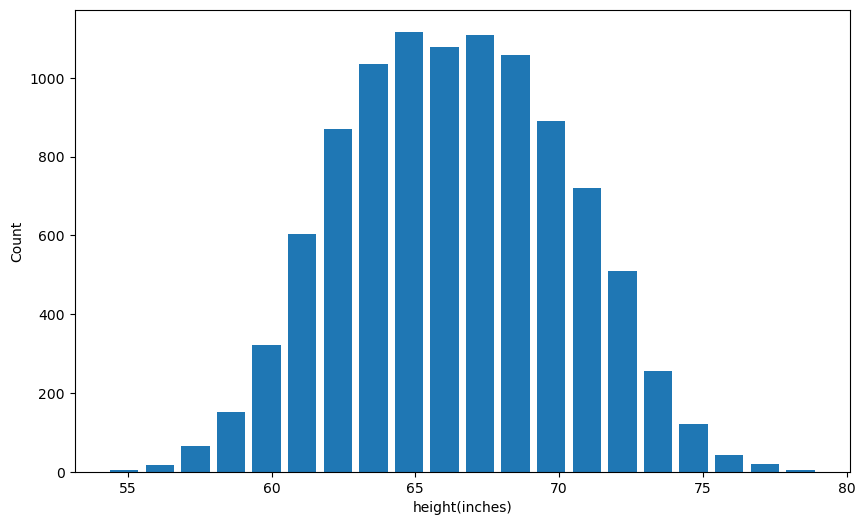

In [4]:
plt.hist(df.height,rwidth=0.8,bins=20)
plt.xlabel('height(inches)')
plt.ylabel('Count')
# bins=number of vertical lines

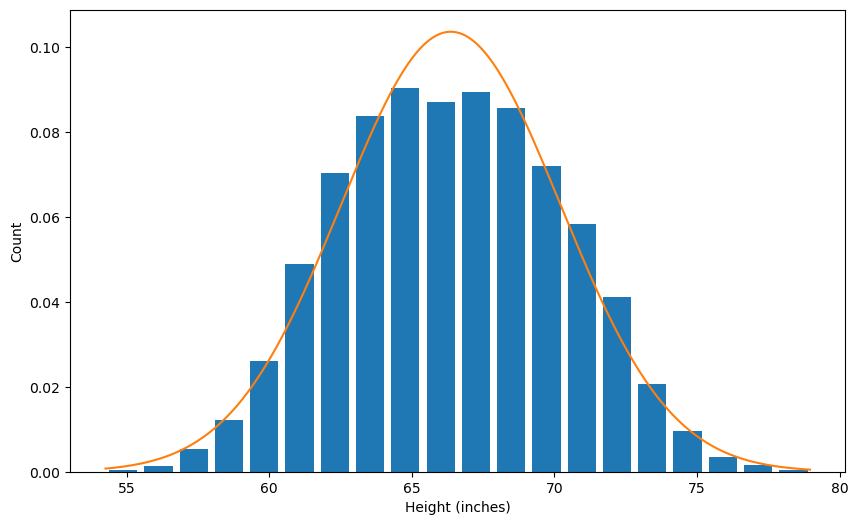

In [5]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [6]:
df.height.mean()

66.367559754866

In [7]:
# standard daviation: it means how far away is your data from mean
#exp: if your height is 75 than std is high but if your height is 70 your std is less
df.height.std()
# here std is  3.84 means the last data is 3.84 std away from mean

3.847528120795573

(1) Outlier detection and removal using 3 standard deviation
One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [9]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [10]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

54.824975392479274

In [11]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

Now remove these outliers and generate new dataframe

In [13]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [14]:
 df_no_outlier_std_dev.shape

(9993, 2)

(2) Outlier detection and removal using Z Score
# Z score is a way to achieve same thing that we did above in part (1)# 
Z score indicates how many standard deviation away a data point is

For example in our case mean is 66.37 and standard deviation is 3.4.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 *
 3.84)

In [16]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [18]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [19]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [36]:
df_no_outliers.shape

(9993, 3)

In [38]:
df2=pd.read_csv("bhp.csv")
df2.shape

(13200, 7)

In [40]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [60]:
min,max=df2['price_per_sqft'].quantile([0.001,0.999])
min

1366.184

In [62]:
max

50959.36200000098

In [66]:
df3=df2[(df2.price_per_sqft>min)& (df2.price_per_sqft<max)]
df3.shape

(13172, 7)

Text(0, 0.5, 'Count')

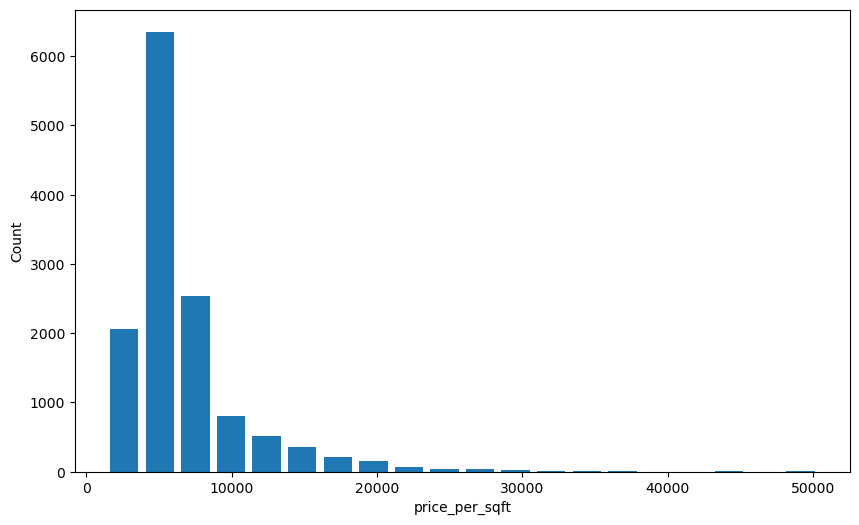

In [72]:
plt.hist(df3.price_per_sqft,rwidth=0.8,bins=20)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

In [78]:
max_limit=df3.price_per_sqft.mean()+4*df3.price_per_sqft.std()
min_limit=df3.price_per_sqft.mean()-4*df3.price_per_sqft.std()

In [88]:
df3.price_per_sqft.mean()

6663.6537351958705

In [80]:
df4=df3[(df3.price_per_sqft<max_limit)&(df3.price_per_sqft>min_limit)]
df4.shape

(13047, 7)

Text(0, 0.5, 'Count')

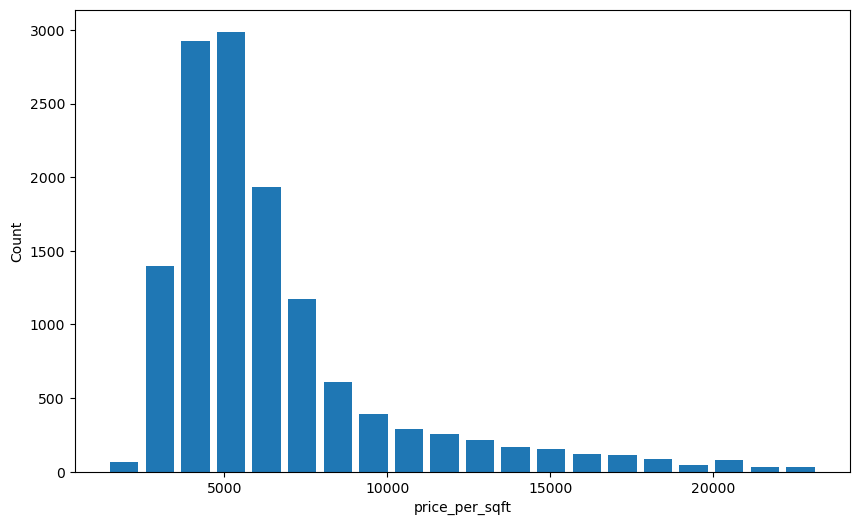

In [82]:
plt.hist(df4.price_per_sqft,rwidth=0.8,bins=20)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

In [90]:
df4.price_per_sqft.mean()

6449.328044761248

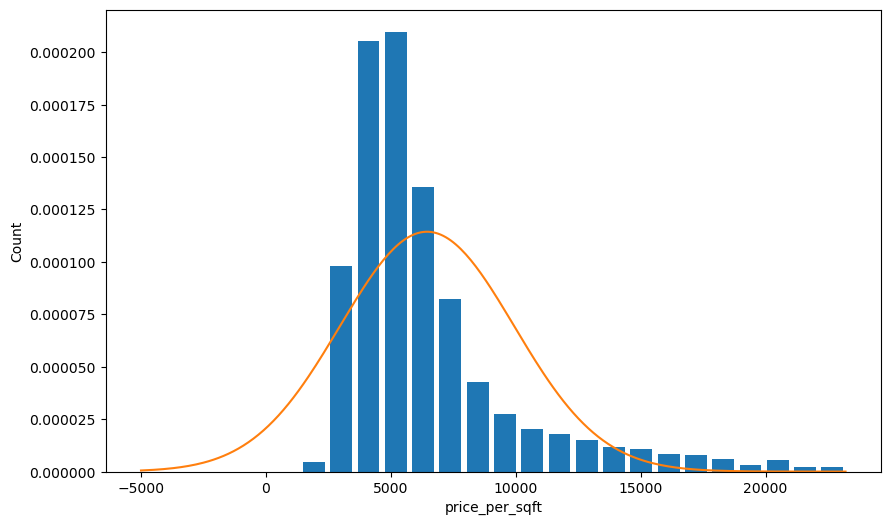

In [102]:
plt.hist(df4.price_per_sqft,rwidth=0.8,bins=20,density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
rng2 = np.arange(-5000, df4.price_per_sqft.max(),100)
plt.plot(rng2, norm.pdf(rng2,df4.price_per_sqft.mean(),df4.price_per_sqft.std()))

In [104]:
df3.shape

(13172, 7)

In [108]:
df3['zscore']=(df3.price_per_sqft-df3.price_per_sqft.mean())/df3.price_per_sqft.std()
df3.head()    

C:\Users\Alamin\AppData\Local\Temp\ipykernel_15132\346605489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['zscore']=(df3.price_per_sqft-df3.price_per_sqft.mean())/df3.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [110]:
df5=df4[(df3.zscore>-4)& (df3.zscore<4)]
df5.shape

C:\Users\Alamin\AppData\Local\Temp\ipykernel_15132\1811266971.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5=df4[(df3.zscore>-4)& (df3.zscore<4)]


(13047, 7)